In [178]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

import numpy as np
from scipy import optimize
from model import Model
from matplotlib import pyplot as plt
from Simulation import simulate
import EGM
import tools
import DC_EGM
import Estimation as est
import pickle
import seaborn as sns
import auxiliary_funcs as af

import warnings
warnings.filterwarnings('ignore') #:)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [179]:
# parameter set 1
# High edu among all rich (slightly higher among smart)
# High edu with poor, smart. Very low edu with poor, stupid
# Smart matters more than rich
par1 = {'a_max': 100,
        'Smax': 6,
        'sigma_taste': 0.3,
        'sigma': 0.5,
        'm_initial': 10,
        'phi_high': 3,
        'phi_low': 1,
        'theta_high': 0.66,
        'theta_low': 0.33,
        'lambda_max': 0.797
        }

# parameter set 2
# High edu among rich, low among poor. Slightly higher edu among smart than poor
# rich matters more than smart
par2 = {'a_max':100,
        'Smax': 6,
        'sigma_taste': 0.3,
        'sigma': 0.5,
        'm_initial': 1,
        'phi_high': 5,
        'phi_low': 1,
        'theta_high':0.66,
        'theta_low':0.33,
        'lambda_max':0.797
        }

# parameter set 3
# Rich are better educated than poor, smart are better educated than stupid.
# Rich and smart are approx equally important
par3 = {'a_max': 80,
        'Smax': 6,
        'sigma_taste':0.3,
        'sigma': 0.4,
        'm_initial':5,
        'phi_high':3,
        'phi_low': 1,
        'theta_high':0.8,
        'theta_low':0.1,
        'lambda_max':0.797
        }

In [180]:
model = Model()
model.setup()

# solution and simulation specs
model.par.Na = 200
model.par.Tmax = 45
model.par.Tsim = model.par.Tmax
model.par.Ntypes = 4
model.par.N = 10000

# set parameters
for key, val in par2.items():
    model.par.__setattr__(key, val)


model.set_grids()
par = model.par
sol = model.sol
sim = model.sim

In [181]:
model.solve()
print('solved')

solved


In [182]:
est.reset_sim(sim, model)
simulate(sim, sol, par)
print('simulated')

simulated


Text(0.5, 1.0, 'Consumption')

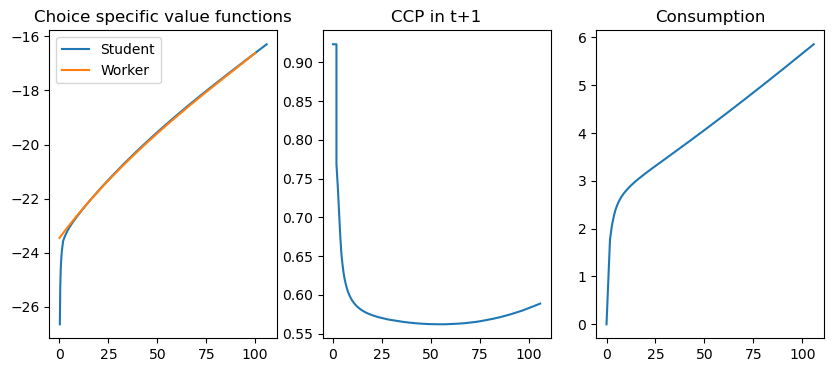

In [183]:
%matplotlib inline
t = 4
s = 4
type = 3

fig,ax = plt.subplots(1,3,figsize=(10,4))

ax[0].plot(sol.m[type,t,0,s,1:,0],sol.V[type,t,0,s,1:,0],label = "Student")
ax[0].plot(sol.m[type,t,1,s,1:,0],sol.V[type,t,1,s,1:,0],label = "Worker")
ax[0].legend()
ax[0].set_title('Choice specific value functions')

ax[1].plot(sol.m[type,t,0,s,:,0],sol.ccp_work[type,t,0,s,:,0],label = "Student")
ax[1].set_title('CCP in t+1')

ax[2].plot(sol.m[type,t,0,s,:,0],sol.c[type,t,0,s,:,0],label = "Student")
ax[2].set_title('Consumption')

Text(0.5, 1.0, 'Savings')

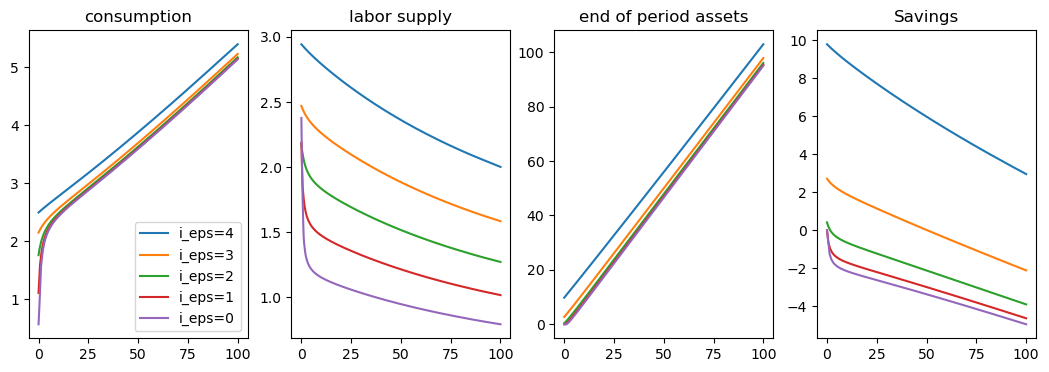

In [184]:
# plot some policy functions, just to be sure
t = 0
edu = 0
type = 0 

fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(1,4,1)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.c[type, t, 1, edu, par.Ba:, 4], label='i_eps=4')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.c[type, t, 1, edu, par.Ba:, 3], label='i_eps=3')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.c[type, t, 1, edu, par.Ba:, 2], label='i_eps=2')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.c[type, t, 1, edu, par.Ba:, 1], label='i_eps=1')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.c[type, t, 1, edu, par.Ba:, 0], label='i_eps=0')
ax.set_title('consumption')
ax.legend()

ax = fig.add_subplot(1,4,2)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.ell[type, t, 1, edu, par.Ba:, 4])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.ell[type, t, 1, edu, par.Ba:, 3])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.ell[type, t, 1, edu, par.Ba:, 2])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.ell[type, t, 1, edu, par.Ba:, 1])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.ell[type, t, 1, edu, par.Ba:, 0])
ax.set_title('labor supply')

ax = fig.add_subplot(1,4,3)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.a[type, t, 1, edu, par.Ba:, 4])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.a[type, t, 1, edu, par.Ba:, 3])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.a[type, t, 1, edu, par.Ba:, 2])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.a[type, t, 1, edu, par.Ba:, 1])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.a[type, t, 1, edu, par.Ba:, 0])
ax.set_title('end of period assets')

ax = fig.add_subplot(1,4,4)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.a[type, t, 1, edu, par.Ba:, 4]-sol.m[type, t, 1, edu, par.Ba:, 4])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.a[type, t, 1, edu, par.Ba:, 3]-sol.m[type, t, 1, edu, par.Ba:, 3])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.a[type, t, 1, edu, par.Ba:, 2]-sol.m[type, t, 1, edu, par.Ba:, 2])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.a[type, t, 1, edu, par.Ba:, 1]-sol.m[type, t, 1, edu, par.Ba:, 1])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.a[type, t, 1, edu, par.Ba:, 0]-sol.m[type, t, 1, edu, par.Ba:, 0])
ax.set_title('Savings')

Text(0.5, 1.0, 'm')

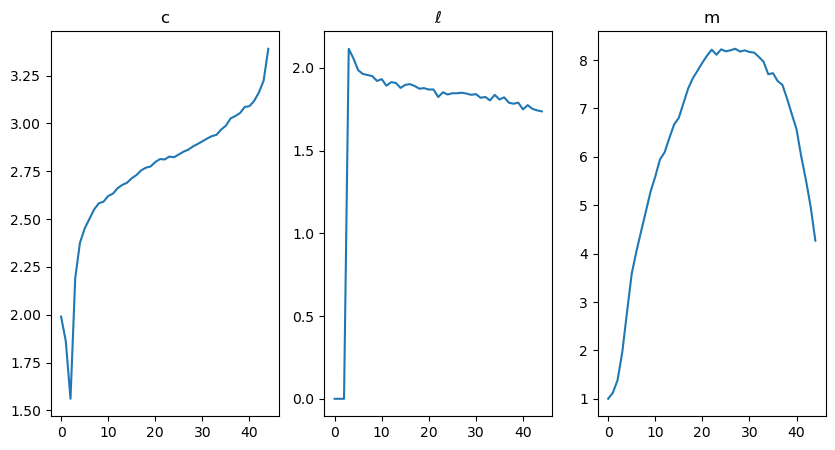

In [185]:
s = sim.S.max(axis=1)
I = s == 3

fig,ax = plt.subplots(1,3,figsize=(10,5))
ax[0].plot(np.mean(sim.c[I,:],axis=0),label="c")
ax[0].set_title('c')

ax[1].plot(np.mean(sim.ell[I,:],axis=0),label="$\ell$")
ax[1].set_title('$\ell$')

ax[2].plot(np.mean(sim.m[I,:],axis=0),label="m")
ax[2].set_title('m')
#fig.legend()

### Euler errors - TBC

In [186]:
Delta_time_c, epsilon_time_c, Delta_time_ell, epsilon_time_ell, epsilon_MRS =  model.euler_errors()  

In [187]:
t0 = sim.type==0
t1 = sim.type == 1
t2 = sim.type == 2
t3 = sim.type == 3

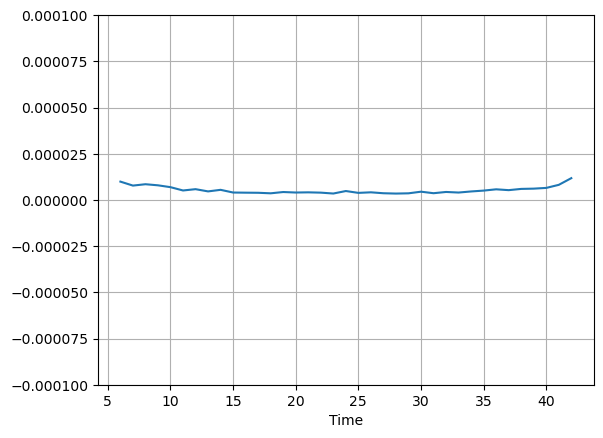

In [208]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(6,43), epsilon_MRS[:,6:-1].mean(axis=0))
#ax.set_title("Avg. MRS error")
ax.grid()
ax.set_ylim(-1e-4,1e-4)
ax.set_xlabel('Time')
fig.savefig('figs/MRS_error.png')

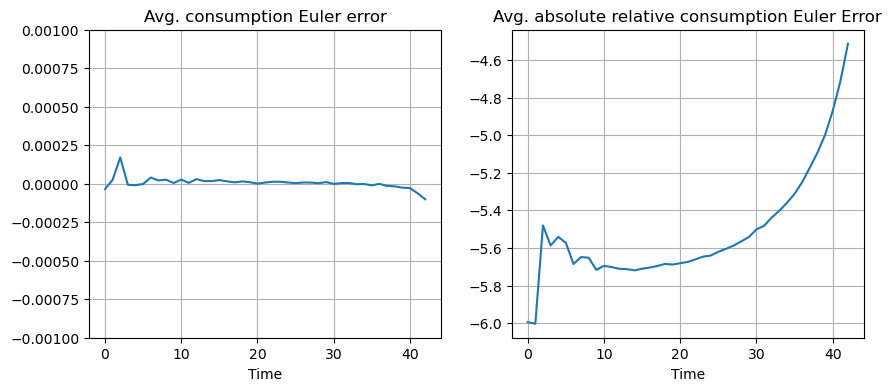

In [207]:
fig =plt.figure(figsize = (10,4))

ax = fig.add_subplot(1,2,1)
ax.plot(Delta_time_c[:-1])
ax.set_title('Avg. consumption Euler error')
ax.grid()
ax.set_ylim(-.001,.001)
ax.set_xlabel('Time')

ax = fig.add_subplot(1,2,2)
ax.plot(np.array(epsilon_time_c[:-1]))
ax.set_title('Avg. absolute relative consumption Euler Error')
ax.grid()
ax.set_xlabel('Time')

fig.savefig('figs/cons_euler_error.png')


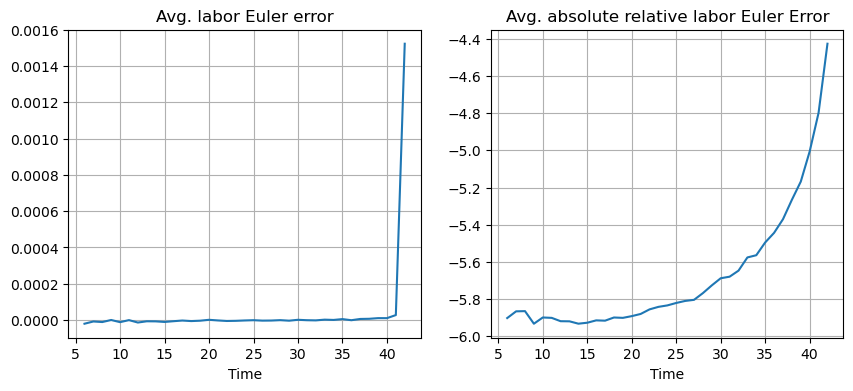

In [209]:
fig =plt.figure(figsize = (10,4))

ax = fig.add_subplot(1,2,1)
ax.plot(Delta_time_ell[:-1])
ax.set_title('Avg. labor Euler error')
ax.grid()
#ax.set_ylim(-.0001,.0001)
ax.set_xlabel('Time')

ax = fig.add_subplot(1,2,2)
ax.plot(np.array(epsilon_time_ell[:-1]))
ax.set_title('Avg. absolute relative labor Euler Error')
ax.grid()
ax.set_xlabel('Time')

fig.savefig('figs/lab_euler_error.png')

# Solution plots

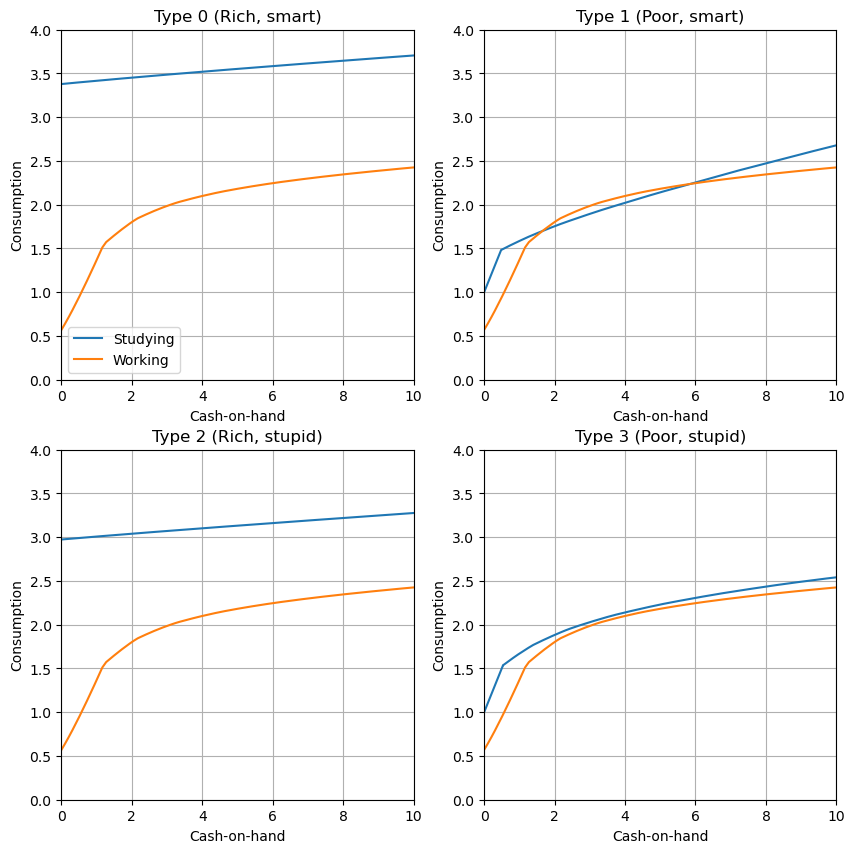

In [191]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))

time = 0
min_a = 0
max_a = 10

min_c = 0
max_c = 4

def plot_c_type(type, title, ax, legend=False):
    ax.plot(sol.m[type,time,0,time,:,0] - par.phi[type], sol.c[type,time,0,time,:,0], label="Studying")
    ax.plot(sol.m[type,time,1,time,:,0], sol.c[type,time,1,time,:,0], label="Working")
    ax.set_title(title)
    ax.set_xlim(min_a, max_a)
    ax.set_ylim(min_c, max_c)
    ax.grid()
    ax.set_xlabel("Cash-on-hand")
    ax.set_ylabel("Consumption")
    if legend:
        ax.legend()

ax0 = fig.add_subplot(2,2,1)
plot_c_type(0,  "Type 0 (Rich, smart)", ax0, legend=True)

ax1 = fig.add_subplot(2,2,2)
plot_c_type(1, "Type 1 (Poor, smart)", ax1)

ax2 = fig.add_subplot(2,2,3)
plot_c_type(2, "Type 2 (Rich, stupid)", ax2)

ax3 = fig.add_subplot(2,2,4)
plot_c_type(3, "Type 3 (Poor, stupid)", ax3)

fig.savefig('figs/c_policy_2x2.png')

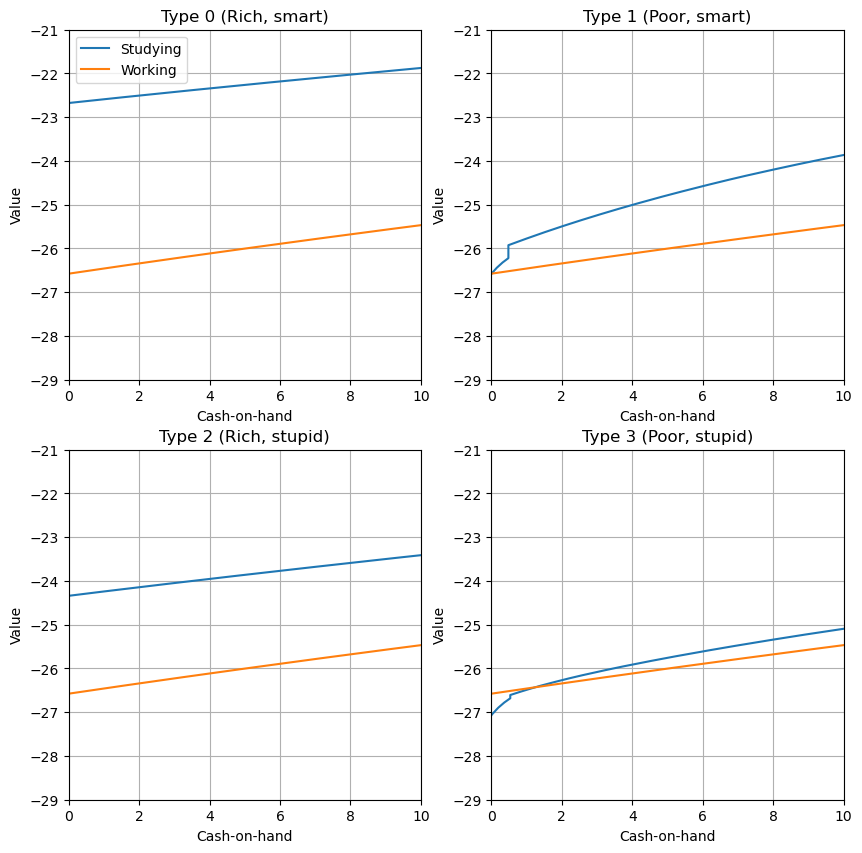

In [192]:
fig = plt.figure(figsize=(10,10))

max_a = 10
min_a = 0

max_v = -21
min_v = -29

time = 0

def plot_v_type(type, time, title, ax, legend=False):
    ax.plot(sol.m[type,time,0,time,2:,0] - par.phi[type], sol.V[type,time,0,time,2:,0], label="Studying")
    ax.plot(sol.m[type,time,1,time,:,0], sol.V[type,time,1,time,:,0], label="Working")
    ax.set_title(title)
    ax.set_xlim(min_a, max_a)
    ax.set_ylim(min_v, max_v)
    ax.grid()
    ax.set_xlabel("Cash-on-hand")
    ax.set_ylabel("Value")
    if legend:
        ax.legend()

ax0 = fig.add_subplot(2,2,1)
plot_v_type(0, time, "Type 0 (Rich, smart)", ax0, legend=True)

ax1 = fig.add_subplot(2,2,2)
plot_v_type(1, time, "Type 1 (Poor, smart)", ax1)

ax2 = fig.add_subplot(2,2,3)
plot_v_type(2, time, "Type 2 (Rich, stupid)", ax2)

ax3 = fig.add_subplot(2,2,4)
plot_v_type(3, time, "Type 3 (Poor, stupid)", ax3)

fig.savefig('figs/value_2x2.png')

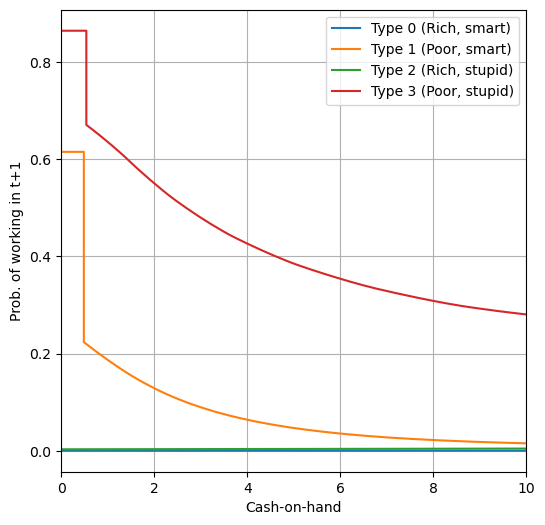

In [193]:
fig = plt.figure(figsize=(6,6))

max_a = 10
min_a = 0

time = 0

def plot_ccp_type(type, time, title, ax, legend=False):
    ax.plot(sol.m[type,time,0,time,2:,0] - par.phi[type], sol.ccp_work[type,time,0,time,2:,0], label=title)
    ax.set_xlim(min_a, max_a)
    ax.grid(True)
    ax.set_xlabel("Cash-on-hand")
    ax.set_ylabel("Prob. of working in t+1")
    if legend:
        ax.legend()

ax0 = fig.add_subplot(1,1,1)
plot_ccp_type(0, time, "Type 0 (Rich, smart)", ax0, legend=True)
plot_ccp_type(1, time, "Type 1 (Poor, smart)", ax0, legend=True)
plot_ccp_type(2, time, "Type 2 (Rich, stupid)", ax0, legend=True)
plot_ccp_type(3, time, "Type 3 (Poor, stupid)", ax0, legend=True)

fig.savefig('figs/ccps_t0.png')

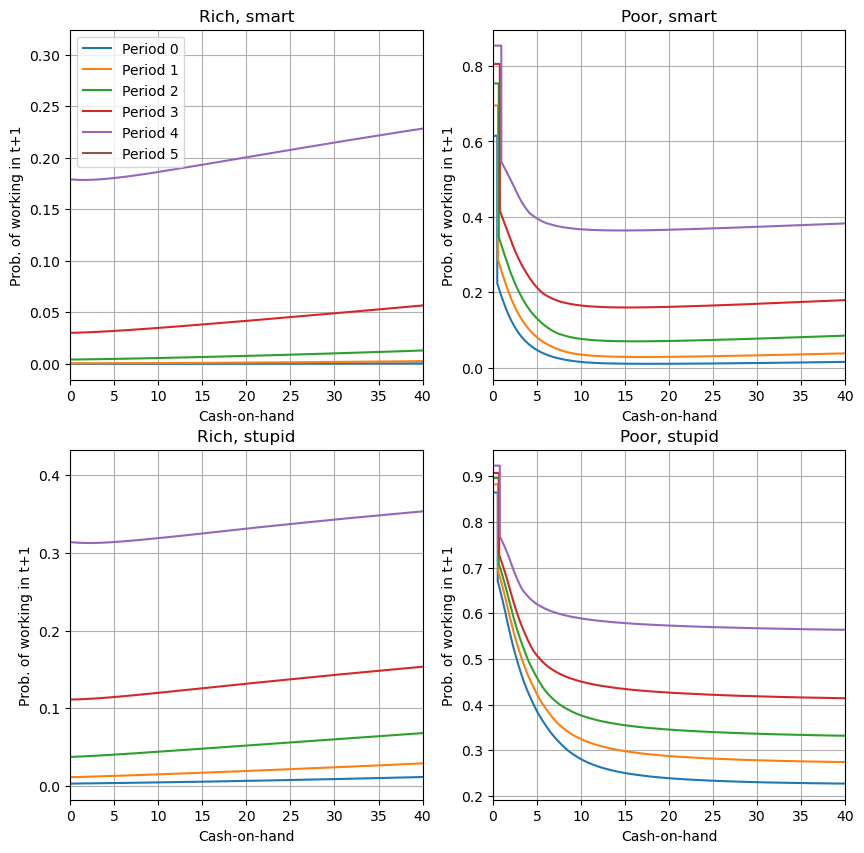

In [194]:
fig = plt.figure(figsize=(10,10))

max_a = 40
min_a = 0

ax0 = fig.add_subplot(2,2,1)
plot_ccp_type(0, 0, "Period 0", ax0, legend=True)
plot_ccp_type(0, 1, "Period 1", ax0, legend=True)
plot_ccp_type(0, 2, "Period 2", ax0, legend=True)
plot_ccp_type(0, 3, "Period 3", ax0, legend=True)
plot_ccp_type(0, 4, "Period 4", ax0, legend=True)
plot_ccp_type(0, 5, "Period 5", ax0, legend=True)
ax0.set_title('Rich, smart')

ax1 = fig.add_subplot(2,2,2)
plot_ccp_type(1, 0, "Period 0", ax1)
plot_ccp_type(1, 1, "Period 1", ax1)
plot_ccp_type(1, 2, "Period 2", ax1)
plot_ccp_type(1, 3, "Period 3", ax1)
plot_ccp_type(1, 4, "Period 4", ax1)
plot_ccp_type(1, 5, "Period 5", ax1)
ax1.set_title('Poor, smart')

ax2 = fig.add_subplot(2,2,3)
plot_ccp_type(2, 0, "Period 0", ax2)
plot_ccp_type(2, 1, "Period 1", ax2)
plot_ccp_type(2, 2, "Period 2", ax2)
plot_ccp_type(2, 3, "Period 3", ax2)
plot_ccp_type(2, 4, "Period 4", ax2)
plot_ccp_type(2, 5, "Period 5", ax2)
ax2.set_title('Rich, stupid')

ax3 = fig.add_subplot(2,2,4)
plot_ccp_type(3, 0, "Period 0", ax3)
plot_ccp_type(3, 1, "Period 1", ax3)
plot_ccp_type(3, 2, "Period 2", ax3)
plot_ccp_type(3, 3, "Period 3", ax3)
plot_ccp_type(3, 4, "Period 4", ax3)
plot_ccp_type(3, 5, "Period 5", ax3)
ax3.set_title('Poor, stupid')

fig.savefig('figs/ccp_2x2.png')

In [195]:
def wage(type, edu, eps, par):
    return np.exp(par.lambda_vec[edu]*np.log(1+par.theta[type]) + eps)

eps = np.random.normal(0, scale=par.sigma, size=1000)
wage_high = []
wage_low = []
for n in range(par.Smax):
    wage_high.append((af.wage_func(n, 0, 1, eps, par)).mean())
    wage_low.append((af.wage_func(n, 0, 3, eps, par)).mean())

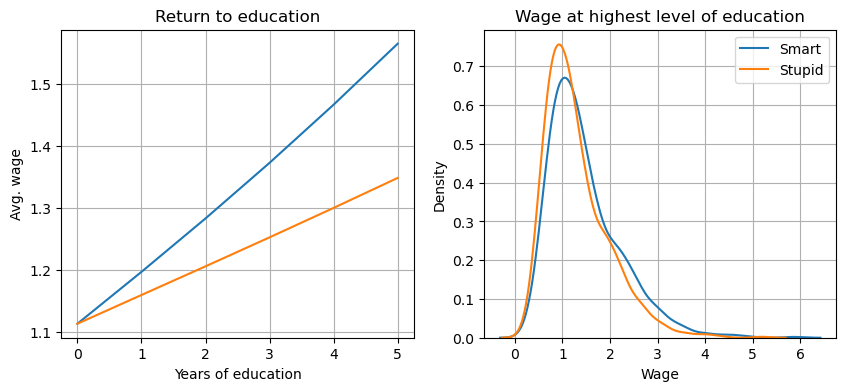

In [196]:
from scipy.stats import gaussian_kde
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(wage_high, label='Smart')
ax1.plot(wage_low, label='Stupid')
ax1.set_ylabel("Avg. wage")
ax1.set_xlabel("Years of education")
ax1.set_title("Return to education")
ax1.grid(True)


wage0 = wage(0, 4, eps, par)
wage3 = wage(3, 4, eps, par)
ax2 = fig.add_subplot(1,2,2)
sns.kdeplot(wage0, ax=ax2, label='Smart')
sns.kdeplot(wage3, ax=ax2, label='Stupid')
ax2.set_xlabel("Wage")
ax2.legend()
ax2.set_title("Wage at highest level of education")
ax2.grid(True)

fig.savefig('figs/wage_return.png')

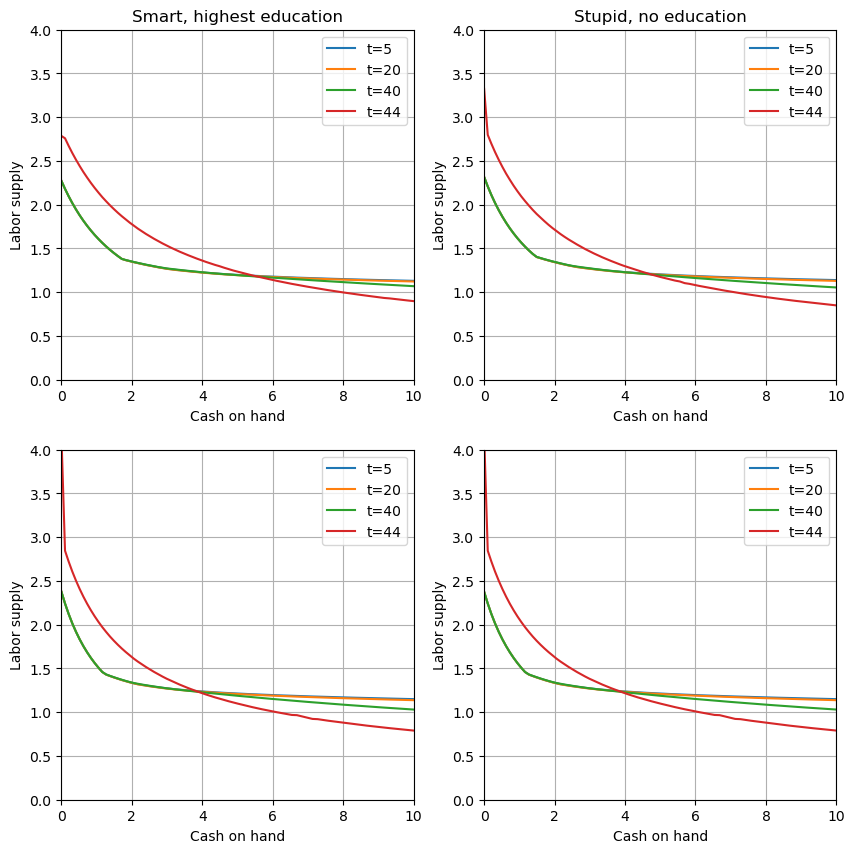

In [197]:
def plot_ell_work(type, times, edu, ax, legend=False):
    for time in times:
        ax.plot(sol.m[type,time,1,edu,par.Ba:,0], sol.ell[type,time,1,edu,par.Ba:,0], label=f't={time}')

    ax.set_xlabel("Cash on hand")
    ax.set_ylabel("Labor supply")
    ax.legend()
    ax.set_xlim(min_m, max_m)
    ax.set_ylim(min_l, max_l)
    ax.grid(True)

max_m = 10
min_m = 0
max_l = 4
min_l = 0
times = [5, 20, 40, 44]

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(2,2,1)
plot_ell_work(0, times, -1, ax0)
ax0.set_title('Smart, highest education')

ax1 = fig.add_subplot(2,2,2)
plot_ell_work(3,  times, -1, ax1)
ax1.set_title('Stupid, highest education')

ax2 = fig.add_subplot(2,2,3)
plot_ell_work(0, times, 0, ax2)
ax1.set_title('Smart, no education')

ax3 = fig.add_subplot(2,2,4)
plot_ell_work(3, times, 0, ax3)
ax1.set_title('Stupid, no education')

fig.savefig('figs/labor_2x2')


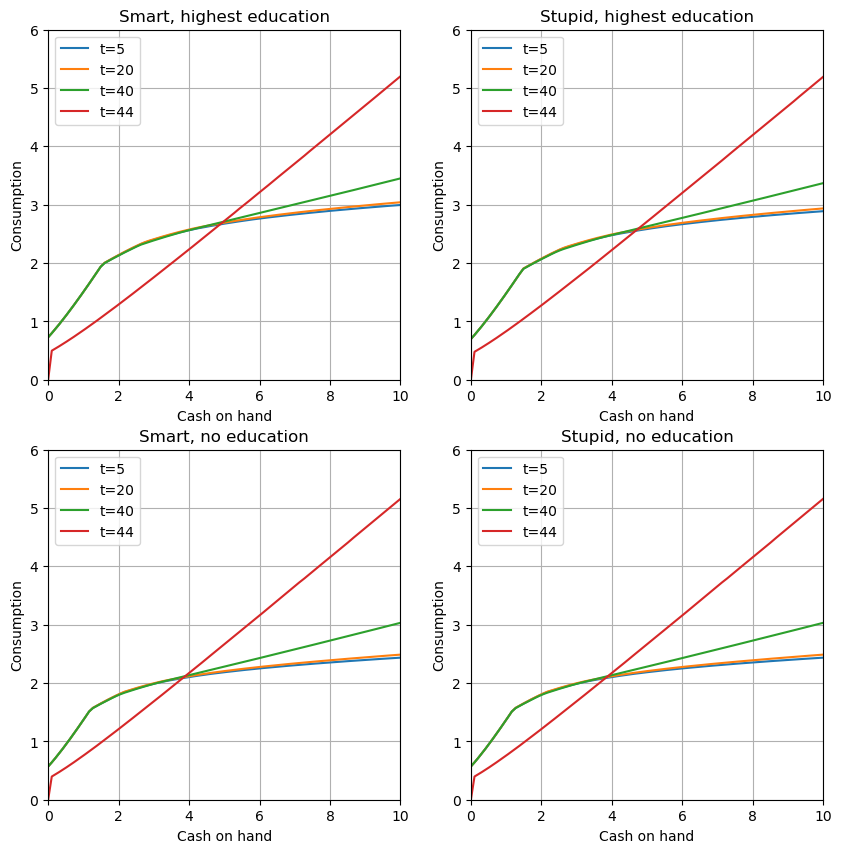

In [198]:
def plot_c_work(type, times, edu, ax, legend=False):
    for time in times:
        ax.plot(sol.m[type,time,1,edu,par.Ba:,0], sol.c[type,time,1,edu,par.Ba:,0], label=f't={time}')

    ax.set_xlabel("Cash on hand")
    ax.set_ylabel("Consumption")
    ax.legend()
    ax.set_xlim(min_m, max_m)
    ax.set_ylim(min_c, max_c)
    ax.grid(True)

max_m = 10
min_m = 0
max_c = 6
min_c = 0
times = [5, 20, 40, 44]

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(2,2,1)
plot_c_work(0, times, 4, ax0)
ax0.set_title('Smart, highest education')

ax1 = fig.add_subplot(2,2,2)
plot_c_work(3,  times, -1, ax1)
ax1.set_title('Stupid, highest education')

ax2 = fig.add_subplot(2,2,3)
plot_c_work(0, times, 0, ax2)
ax2.set_title('Smart, no education')

ax3 = fig.add_subplot(2,2,4)
plot_c_work(3, times, 0, ax3)
ax3.set_title('Stupid, no education')

fig.savefig('figs/c_work_2x2.png')

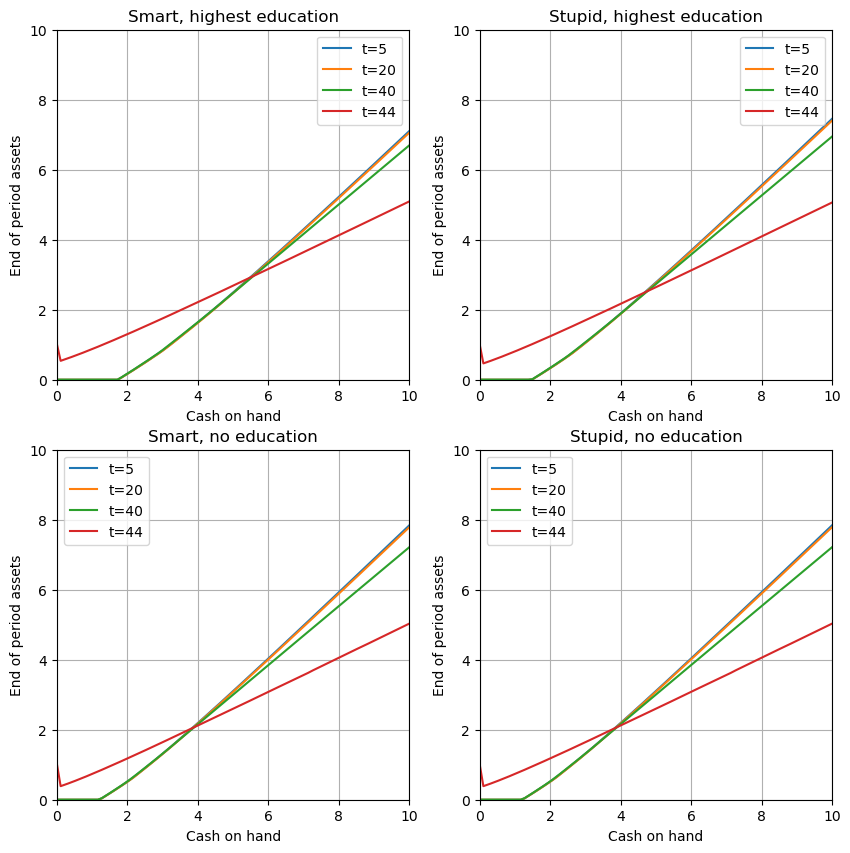

In [199]:
def plot_a_work(type, times, edu, ax, legend=False):
    for time in times:
        ax.plot(sol.m[type,time,1,edu,par.Ba:,0], sol.a[type,time,1,edu,par.Ba:,0], label=f't={time}')

    ax.set_xlabel("Cash on hand")
    ax.set_ylabel("End of period assets")
    ax.legend()
    ax.set_xlim(min_m, max_m)
    ax.set_ylim(min_a, max_a)
    ax.grid(True)

max_m = 10
min_m = 0
max_a = 10
min_a = 0
times = [5, 20, 40, 44]

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(2,2,1)
plot_a_work(0, times, -1, ax0)
ax0.set_title('Smart, highest education')

ax1 = fig.add_subplot(2,2,2)
plot_a_work(3,  times, -1, ax1)
ax1.set_title('Stupid, highest education')

ax2 = fig.add_subplot(2,2,3)
plot_a_work(0, times, 0, ax2)
ax2.set_title('Smart, no education')

ax3 = fig.add_subplot(2,2,4)
plot_a_work(3, times, 0, ax3)
ax3.set_title('Stupid, no education')

fig.savefig('figs/a_work_2x2.png')

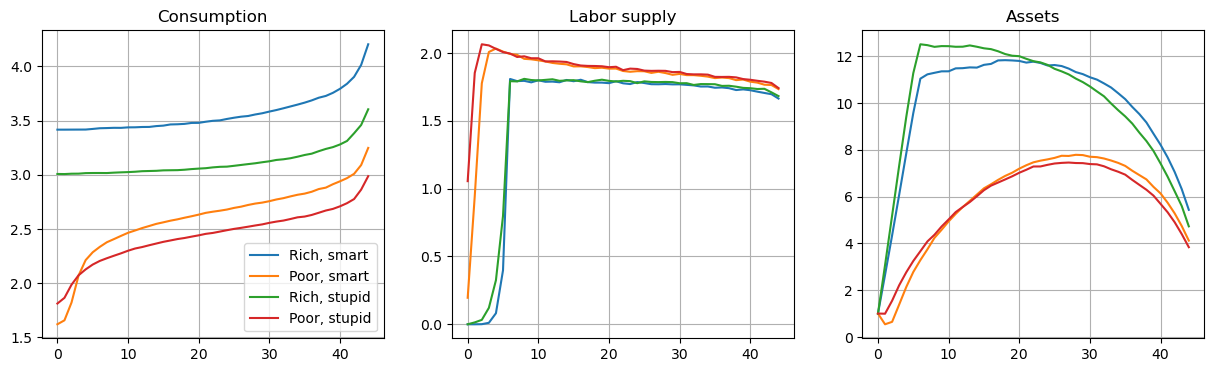

In [200]:
t0 = sim.type == 0
t1 = sim.type == 1
t2 = sim.type == 2
t3 = sim.type == 3

fig = plt.figure(figsize=(15,4))

ax0 = fig.add_subplot(1,3,1)
ax0.plot(sim.c[t0].mean(axis=0), label='Rich, smart')
ax0.plot(sim.c[t1].mean(axis=0), label='Poor, smart')
ax0.plot(sim.c[t2].mean(axis=0), label='Rich, stupid')
ax0.plot(sim.c[t3].mean(axis=0), label='Poor, stupid')
ax0.legend()
ax0.set_title('Consumption')
ax0.grid(True)

ax1 = fig.add_subplot(1,3,2)
ax1.plot(sim.ell[t0].mean(axis=0))
ax1.plot(sim.ell[t1].mean(axis=0))
ax1.plot(sim.ell[t2].mean(axis=0))
ax1.plot(sim.ell[t3].mean(axis=0))
ax1.set_title('Labor supply')
ax1.grid(True)

ax2 = fig.add_subplot(1,3,3)
ax2.plot(sim.m[t0].mean(axis=0))
ax2.plot(sim.m[t1].mean(axis=0))
ax2.plot(sim.m[t2].mean(axis=0))
ax2.plot(sim.m[t3].mean(axis=0))
ax2.set_title('Assets')
ax2.grid(True)

fig.savefig('figs/sim_life.png')

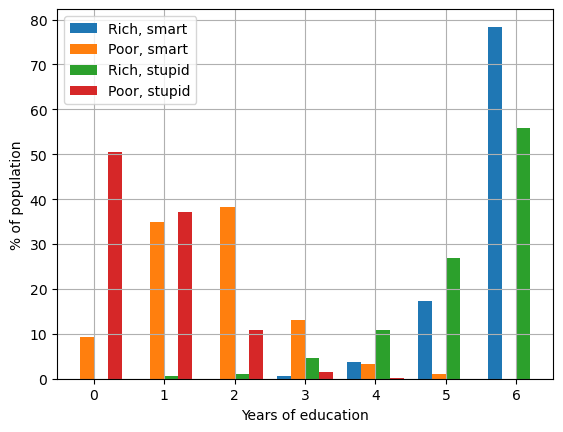

In [201]:
t0 =sim.type == 0
t1 = sim.type == 1
t2 = sim.type == 2
t3 = sim.type == 3

s = sim.S.max(axis=1)

t0_vec = np.unique(s[t0], return_counts=True)
t1_vec = np.unique(s[t1], return_counts=True)
t2_vec = np.unique(s[t2], return_counts=True)
t3_vec = np.unique(s[t3], return_counts=True)

width = 0.2
offset = [-0.3, -0.1, 0.1, 0.3]
vecs = [t0_vec, t1_vec, t2_vec, t3_vec]
labels = ['Rich, smart', 'Poor, smart', 'Rich, stupid', 'Poor, stupid']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for i,vec in enumerate(vecs):
    denom = (vec[1]/vec[1].sum())*100
    ax.bar(vec[0] + offset[i], denom, width=width, label=labels[i])

ax.set_xlabel('Years of education')
ax.set_ylabel('% of population')
ax.legend()
ax.grid()

fig.savefig('figs/education.png')

# Estimation fun

In [202]:
stop

NameError: name 'stop' is not defined

In [ ]:
import copy
data = copy.deepcopy(sim)

In [ ]:
data_true = copy.deepcopy(data)
share_Rich = np.sum((data_true.type == 0) + (data_true.type == 2)) / len(data_true.type) 
share_Poor = 1-share_Rich

In [ ]:
est.obj([0.5,0.5], data, model, [share_Rich, share_Poor], "I" )

[0.2521, 0.2479, 0.2521, 0.2479]
Moment_sim is [1.97000e-02 1.73400e-01 6.72600e-01 2.26220e+00 7.12890e+00 2.23834e+01
 6.73596e+01 4.41400e-01 3.07230e+01 3.49768e+01 2.48536e+01 7.16080e+00
 1.86200e+00 3.55000e-01 6.88000e-02 6.52000e-02]
Moment_data is [0.00000e+00 3.17300e-01 5.15700e-01 2.59820e+00 7.23920e+00 2.19952e+01
 6.73344e+01 4.40400e-01 2.98104e+01 3.59217e+01 2.46874e+01 7.32150e+00
 1.73460e+00 5.04200e-01 2.02000e-02 6.58000e-02]
2.142218680968959


2.142218680968959

In [ ]:
N = 10

p1s = np.linspace(1e-8, 1-1e-8, N)
p2s = np.linspace(1e-8, 1-1e-8, N)

criterion = np.zeros((N,N))

for i1,p1 in enumerate(p1s):
    for i2,p2 in enumerate(p2s):
        c = est.obj([p1,p2], data, model, [share_Rich, share_Poor], "I")
        criterion[i1,i2] = c

to_file = (p1s, p2s, criterion)

with open('criterion_plot_10000','wb') as file:
    pickle.dump(to_file, file)

[5.042e-09, 4.9580000000000005e-09, 0.5041999949579999, 0.495799995042]
Moment_sim is [8.69000e-02 3.19800e-01 1.18940e+00 4.10370e+00 1.09109e+01 2.64989e+01
 5.68903e+01 4.26900e-01 5.25624e+01 3.51592e+01 1.09423e+01 1.18260e+00
 1.33300e-01 1.22000e-02 8.10000e-03 3.07000e-02]
Moment_data is [0.00000e+00 3.17300e-01 5.15700e-01 2.59820e+00 7.23920e+00 2.19952e+01
 6.73344e+01 4.40400e-01 2.98104e+01 3.59217e+01 2.46874e+01 7.32150e+00
 1.73460e+00 5.04200e-01 2.02000e-02 6.58000e-02]
893.2274003843825
[5.042e-09, 0.055088892745111105, 0.5041999949579999, 0.44071110725488893]
Moment_sim is [7.13000e-02 2.93600e-01 1.17080e+00 4.13000e+00 1.09973e+01 2.64876e+01
 5.68495e+01 4.26900e-01 4.75112e+01 3.53651e+01 1.38377e+01 2.61320e+00
 5.68000e-01 8.48000e-02 2.01000e-02 3.86000e-02]
Moment_data is [0.00000e+00 3.17300e-01 5.15700e-01 2.59820e+00 7.23920e+00 2.19952e+01
 6.73344e+01 4.40400e-01 2.98104e+01 3.59217e+01 2.46874e+01 7.32150e+00
 1.73460e+00 5.04200e-01 2.02000e-02 6.5800

Text(0.5, 0.5, 'p2')

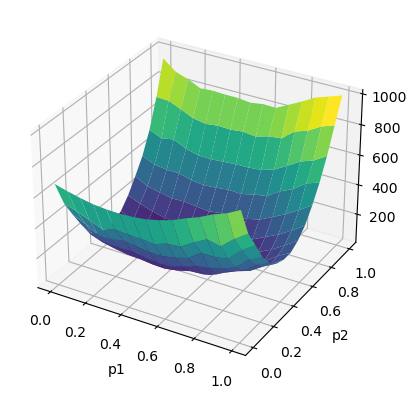

In [ ]:
%matplotlib inline

with open('criterion_plot', 'rb') as file:
    p1s, p2s, criterion = pickle.load(file)

p1_mesh, p2_mesh = np.meshgrid(p1s, p2s,  indexing='ij')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(p1_mesh, p2_mesh, criterion, cmap='viridis')
ax.set_xlabel('p1')
ax.set_ylabel('p2')
